Importing dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

Reading data from World Bank open data website using a json api and converting it into a pandas dataframe

In [2]:
df = pd.read_json('https://finances.worldbank.org/resource/yu93-ayrw.json')

Getting a glance of the read data

In [3]:
pd.set_option('display.max_rows', None)
df.head()

,actuals,fiscal_year,notes,organizational_unit,subtotals,vice_presidential_unit_or_grouping
0,NaN,2009,NaN,Operational units,1317.7,Operational units Total
1,199.7,2009,NaN,Grant-making Facilities,NaN,Grant-making Facilities
2,24.1,2009,Centrally-managed accounts and programs includ...,Centrally-managed accounts and programs,NaN,Centrally-managed accounts and programs
3,431.8,2009,Institutional Services includes units such as:...,Institutional services,NaN,Institutional services
4,313.2,2009,Administrative services Includes General Servi...,Administrative services,NaN,Administrative services


Looking at the data types of the dataframe

In [4]:
df.dtypes

actuals                               float64
fiscal_year                             int64
notes                                  object
organizational_unit                    object
subtotals                             float64
vice_presidential_unit_or_grouping     object
dtype: object

Replacing missing values in actuals column to zero

In [5]:
df['actuals'].replace(to_replace = np.NaN, value = 0, inplace = True)

In [6]:
df['actuals'].head()

0      0.0
1    199.7
2     24.1
3    431.8
4    313.2
Name: actuals, dtype: float64

The notes column would hardly have any  part in our Exploratory analysis but for time being we'll put None in the missing value of the notes column.

In [7]:
df['notes'].replace(to_replace = np.NaN, value = 'None', inplace = True)

In [8]:
df['notes'].head()

0                                                 None
1                                                 None
2    Centrally-managed accounts and programs includ...
3    Institutional Services includes units such as:...
4    Administrative services Includes General Servi...
Name: notes, dtype: object

Imputing missing values in subtotals column to zero since, all the missing entries are anyway unecessary since all subtotals of respective categories of respective years are up tp date in the data.

In [9]:
df['subtotals'].replace(to_replace = np.NaN, value = 0, inplace = True)

In [10]:
df['subtotals'].head()

0    1317.7
1       0.0
2       0.0
3       0.0
4       0.0
Name: subtotals, dtype: float64

Total Expenditures yearwise (2009-2018)

In [11]:
df.groupby(['fiscal_year'])['subtotals'].sum()

fiscal_year
2009    5924.1
2010    6319.7
2011    6366.3
2012    6545.0
2013    6872.4
2014    7096.1
2015    6984.1
2016    6799.4
2017    6895.5
2018    7243.5
Name: subtotals, dtype: float64

Plot for the same

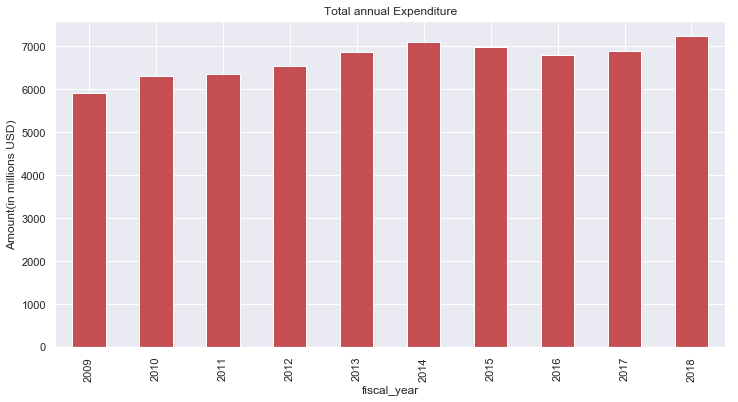

In [12]:
df.groupby(['fiscal_year'])['subtotals'].sum().plot(kind = 'bar',
                                                    figsize = (12,6),
                                                    title = 'Total annual Expenditure',color = 'r')
plt.ylabel('Amount(in millions USD)')
plt.show()

Total annual expenditure of the world bank has been increasing from 2008 to 2014, falling marginally in 2015 and 2016 and is again on a rise in 2017 and 2018

Expenditures by Organizational unit (2009-2018)

In [13]:
df.groupby(['organizational_unit'])['actuals'].sum()

organizational_unit
Administrative services                    4441.8
Centrally-managed accounts and programs    2141.4
Governance services                        1907.9
Grant-making Facilities                    1223.2
Institutional services                     4442.8
Operational units                          5862.3
Reimbursements, fees, others              -4303.5
Total administrative budget                   0.0
Total gross administrative budget             0.0
Name: actuals, dtype: float64

Plot for the same. The negative bar shows the income generated by the bank in the form of reimbursements , fees and other modes as part of the overall transactions.

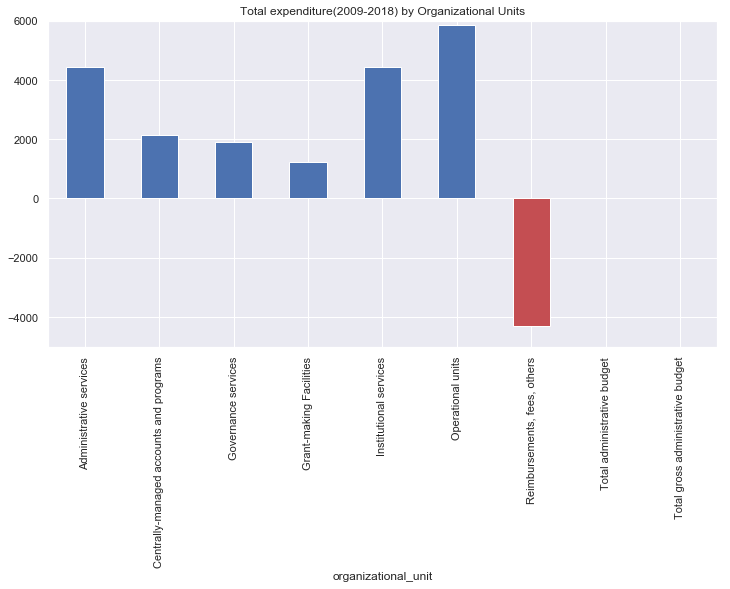

In [14]:
df.groupby(['organizational_unit'])['actuals'].sum().plot(kind = 'bar', 
                                                          title = 'Total expenditure(2009-2018) by Organizational Units',
                                                          ylim = (-5000,6000),figsize = (12,6), color = ['b','b','b','b','b','b','r'])

Expenditures in 2009. Slicing a dataframe df1 for 2009 from the actual dataframe. 

In [15]:
#2009
df1 = df.iloc[0:11,[3,0,4]]
df1

,organizational_unit,actuals,subtotals
0,Operational units,0.0,1317.7
1,Grant-making Facilities,199.7,0.0
2,Centrally-managed accounts and programs,24.1,0.0
3,Institutional services,431.8,0.0
4,Administrative services,313.2,0.0
5,Total administrative budget,0.0,2148.7
6,Operational units,0.0,0.0
7,Total gross administrative budget,0.0,2457.7
8,"Reimbursements, fees, others",-309.0,0.0
9,Operational units,0.0,0.0


Expenditures in 2010. Slicing a dataframe df2 for 2010 from the actual dataframe. 

In [16]:
#2010
df2 = df.iloc[11:22,[3,0,4]]
df2

,organizational_unit,actuals,subtotals
11,"Reimbursements, fees, others",-331.1,0.0
12,Grant-making Facilities,170.1,0.0
13,Institutional services,439.3,0.0
14,Centrally-managed accounts and programs,136.5,0.0
15,Operational units,0.0,1386.6
16,Operational units,0.0,0.0
17,Operational units,0.0,0.0
18,Governance services,182.4,0.0
19,Administrative services,317.3,0.0
20,Total gross administrative budget,0.0,2632.1


Plotting bar charts so as to compare expenditures by organizational unit for the years 2009 and 2010

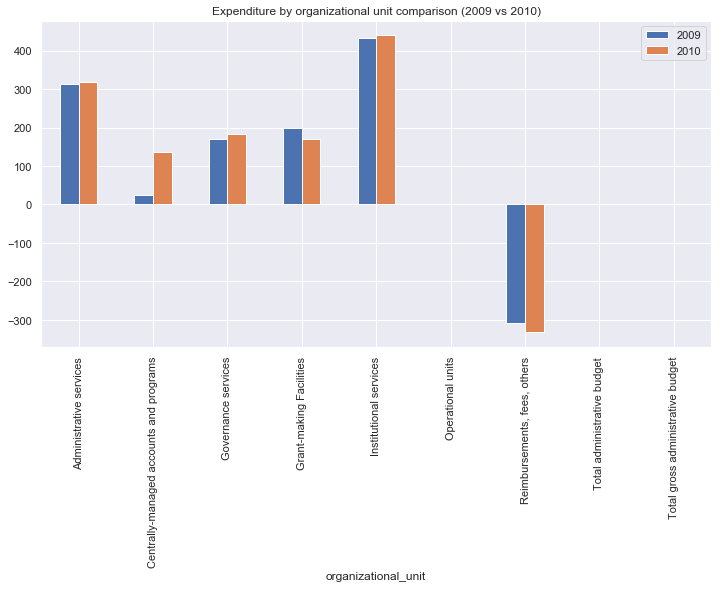

In [17]:
exp2009 = df1.groupby(['organizational_unit'])['actuals'].sum()
exp2010 = df2.groupby(['organizational_unit'])['actuals'].sum()

pd.DataFrame({'2009':exp2009,
             '2010':exp2010}).plot(kind = 'bar',
                                   figsize = (12,6),
                                   title = 'Expenditure by organizational unit comparison (2009 vs 2010)')

Slicing the dataframe for all fiscal years upto 2018

In [18]:
#2011
df3 = df.iloc[22:33,[3,0,4]]

#2012
df4 = df.iloc[33:44,[3,0,4]]

#2013
df5 = df.iloc[44:55,[3,0,4]]

#2014
df6 = df.iloc[55:66,[3,0,4]]

#2015
df7 = df.iloc[66:77,[3,0,4]]

#2016
df8 = df.iloc[77:88,[3,0,4]]

#2017
df9 = df.iloc[88:99,[3,0,4]]

#2018
df10 = df.iloc[99:,[3,0,4]]

Comparing expenditures with respect to organizational units for fiscal years 2011, 2012,2013, respectively

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

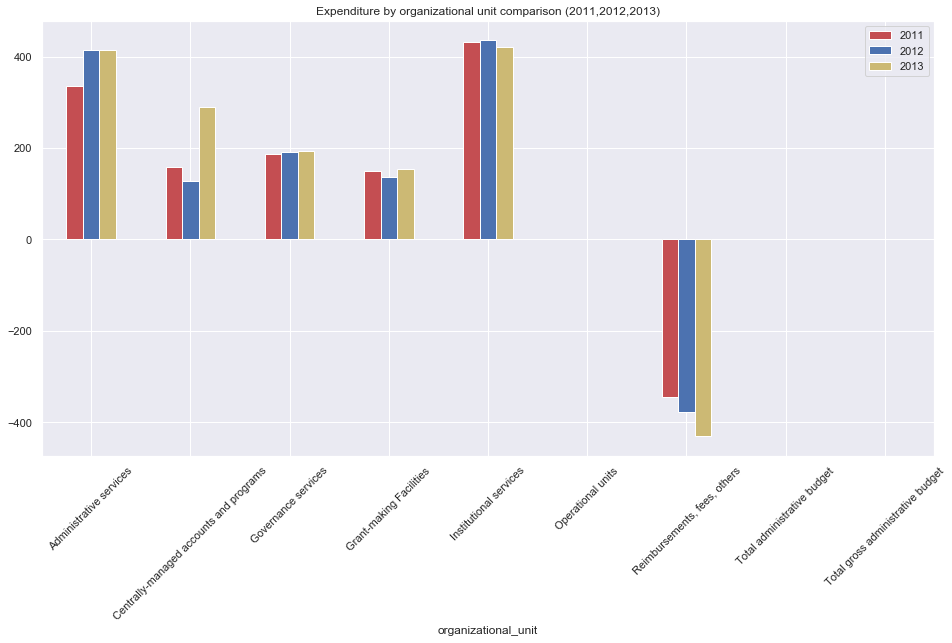

In [40]:
exp2011 = df3.groupby(['organizational_unit'])['actuals'].sum()
exp2012 = df4.groupby(['organizational_unit'])['actuals'].sum()
exp2013 = df5.groupby(['organizational_unit'])['actuals'].sum()

pd.DataFrame({'2011':exp2011,
             '2012':exp2012,
             '2013':exp2013}).plot(kind = 'bar',
                                   figsize = (16,8),
                                   color = ('r','b','y'),
                                   title = 'Expenditure by organizational unit comparison (2011,2012,2013)')
plt.xticks(rotation = 45)

Comparing expenditures with respect to organizational units for fiscal years 2014 and 2015, respectively

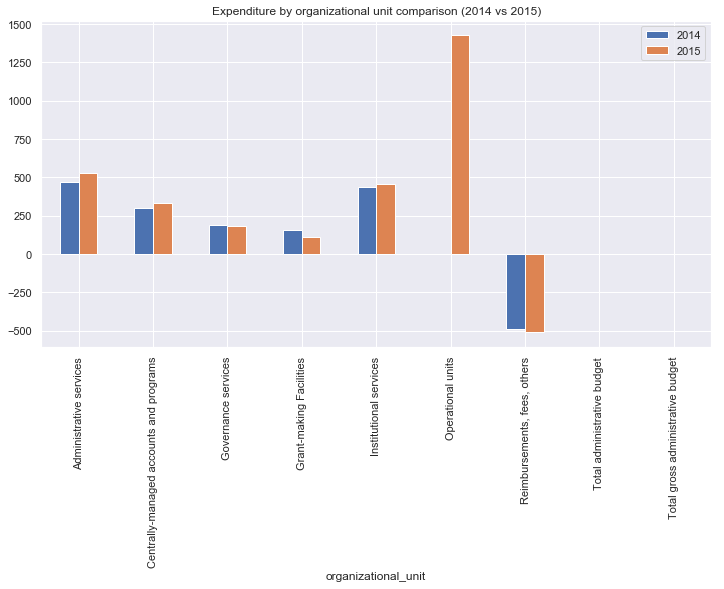

In [38]:
exp2014 = df6.groupby(['organizational_unit'])['actuals'].sum()
exp2015 = df7.groupby(['organizational_unit'])['actuals'].sum()

pd.DataFrame({'2014':exp2014,
             '2015':exp2015}).plot(kind = 'bar',
                                   figsize = (12,6),
                                   title = 'Expenditure by organizational unit comparison (2014 vs 2015)')

Comparing expenditures with respect to organizational units for fiscal years 2016, 2017,2018, respectively

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

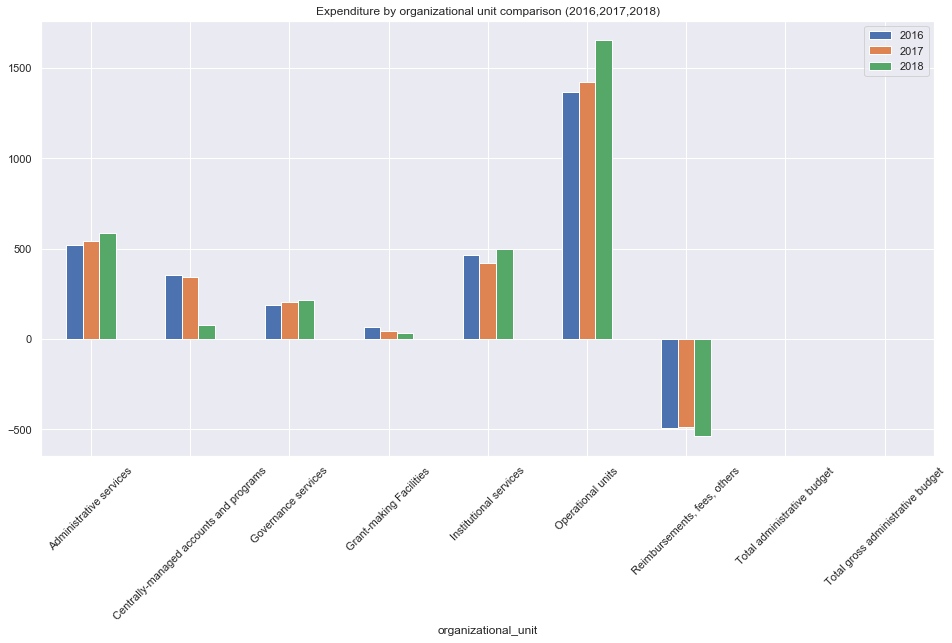

In [34]:
exp2016 = df8.groupby(['organizational_unit'])['actuals'].sum()
exp2017 = df9.groupby(['organizational_unit'])['actuals'].sum()
exp2018 = df10.groupby(['organizational_unit'])['actuals'].sum()

pd.DataFrame({'2016':exp2016,
             '2017':exp2017,
             '2018':exp2018}).plot(kind = 'bar',
                                   figsize = (16,8),
                                   title = 'Expenditure by organizational unit comparison (2016,2017,2018)')
plt.xticks(rotation = 45)

Comparing expenditures with respect to organizational units for fiscal years 2009,2010,2011,2012,2013, respectively

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

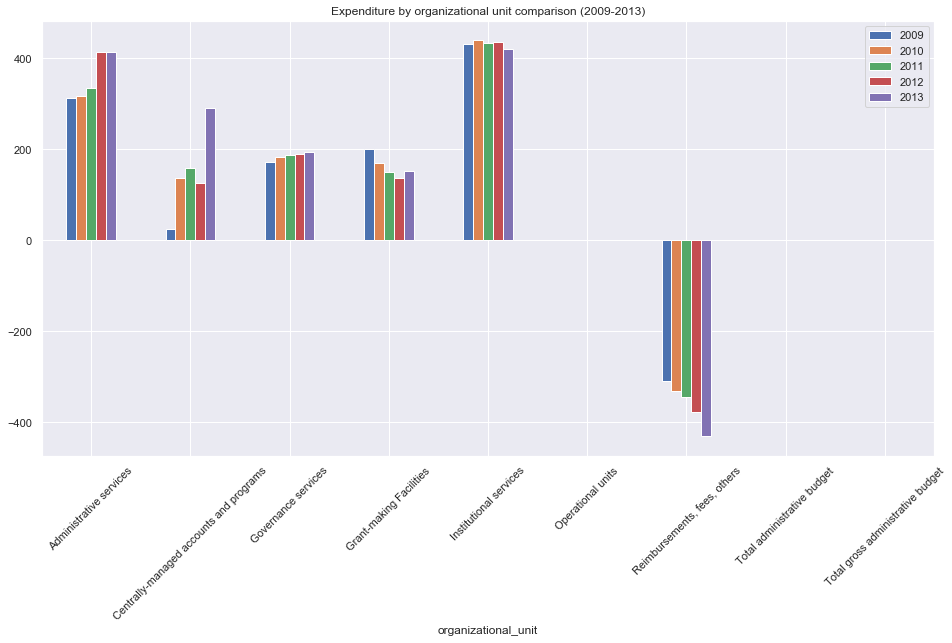

In [32]:
pd.DataFrame({'2009':exp2009,
             '2010':exp2010,
             '2011':exp2011,
             '2012':exp2012,
             '2013':exp2013}).plot(kind = 'bar',
                                   figsize = (16,8),
                                   title = 'Expenditure by organizational unit comparison (2009-2013)')
plt.xticks(rotation = 45)

Comparing expenditures with respect to organizational units for fiscal years 2014,2015,2016,2017,2018, respectively

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

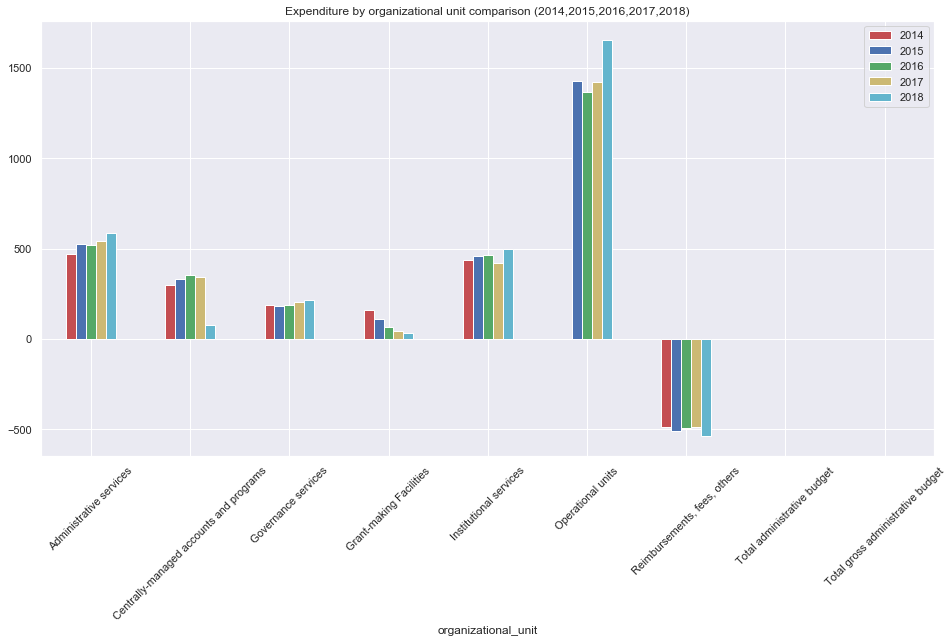

In [33]:
pd.DataFrame({'2014':exp2014,
              '2015':exp2015,
             '2016':exp2016,
             '2017':exp2017,
             '2018':exp2018}).plot(kind = 'bar',
                                   figsize = (16,8),
                                   color = ('r','b','g','y','c'),
                                   title = 'Expenditure by organizational unit comparison (2014,2015,2016,2017,2018)')
plt.xticks(rotation = 45)